# Importing Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('long_data_.csv')
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   States     16599 non-null  object 
 1   Regions    16599 non-null  object 
 2   latitude   16599 non-null  float64
 3   longitude  16599 non-null  float64
 4   Dates      16599 non-null  object 
 5   Usage      16599 non-null  float64
dtypes: float64(3), object(3)
memory usage: 778.2+ KB


In [3]:
df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [4]:
df['Dates'] = pd.to_datetime(df["Dates"], format='%d/%m/%Y %H:%M:%S')
df['New_Date'] = df['Dates'].dt.date
df.head()

,States,Regions,latitude,longitude,Dates,Usage,New_Date
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9,2019-01-02
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3,2019-01-02
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1,2019-01-02
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8,2019-01-02
4,UP,NR,27.599981,78.050006,2019-01-02,313.9,2019-01-02


In [5]:
df['year'] = pd.DatetimeIndex(df['New_Date']).year
df.head()

,States,Regions,latitude,longitude,Dates,Usage,New_Date,year
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9,2019-01-02,2019
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3,2019-01-02,2019
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1,2019-01-02,2019
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8,2019-01-02,2019
4,UP,NR,27.599981,78.050006,2019-01-02,313.9,2019-01-02,2019


In [6]:
df['Regions'].unique()

array(['NR', 'WR', 'SR', 'ER', 'NER'], dtype=object)

In [7]:
df["year"].unique()

array([2019, 2020], dtype=int64)

In [8]:
print("Max Power Usage:")
df[df["Usage"]==df['Usage'].max()]

Max Power Usage:


,States,Regions,latitude,longitude,Dates,Usage,New_Date,year
5424,Maharashtra,WR,19.250232,73.160175,2019-06-20,522.1,2019-06-20,2019


In [9]:
print("Min Power Usage:")
df[df["Usage"]==df['Usage'].min()]

Min Power Usage:


,States,Regions,latitude,longitude,Dates,Usage,New_Date,year
12730,Sikkim,ER,27.33333,88.616647,2020-02-03,0.3,2020-02-03,2020


In [13]:
df["States"].unique()

array(['Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand',
       'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'MP',
       'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana',
       'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand',
       'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
      dtype=object)

In [15]:
df[df["year"]==2020].nunique()

States         33
Regions         5
latitude       33
longitude      32
Dates         144
Usage        1976
New_Date      144
year            1
dtype: int64

In [16]:
df[df["year"]==2019].nunique()

States         33
Regions         5
latitude       33
longitude      32
Dates         354
Usage        3231
New_Date      354
year            1
dtype: int64

# Exploratory Data Analysis

**Power Consumption Based on Year**

Text(0, 0.5, 'Power Usage')

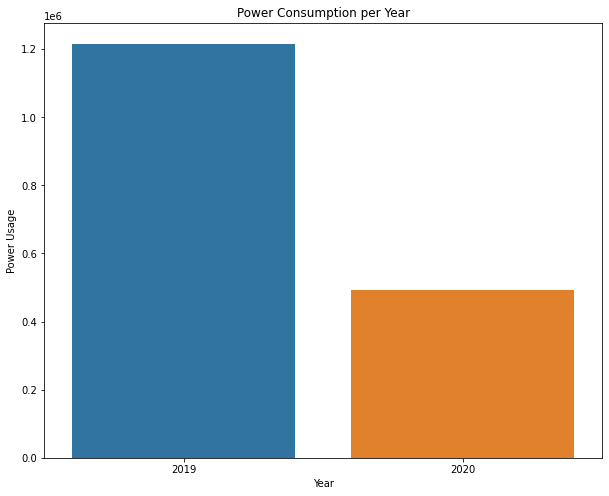

In [23]:
power_per_year = df.groupby("year").sum().sort_values("Usage", ascending=True)
plt.figure(figsize=(10,8))
sns.barplot(x=power_per_year.index,y=power_per_year['Usage'],data=power_per_year)
plt.title("Power Consumption per Year")
plt.xlabel("Year")
plt.ylabel("Power Usage")

**Power Consumption Based on Regions**

Text(0, 0.5, 'Power Usage')

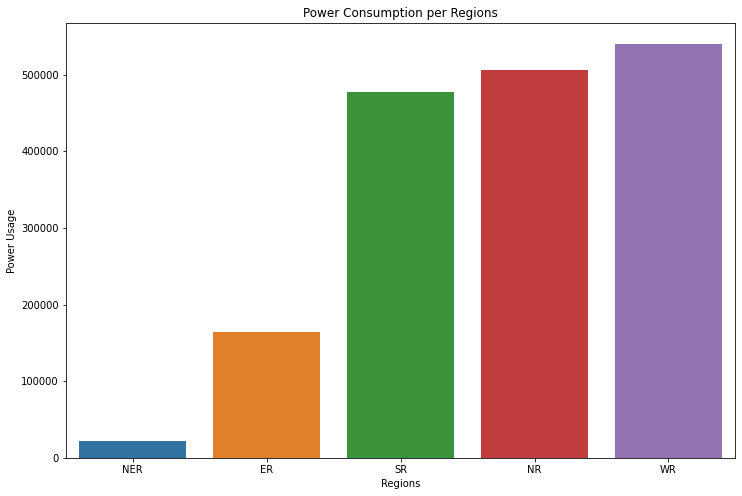

In [24]:
power_per_region = df.groupby("Regions").sum().sort_values("Usage", ascending=True)
plt.figure(figsize=(12,8))
sns.barplot(x=power_per_region.index,y=power_per_region['Usage'],data=power_per_region)
plt.title("Power Consumption per Regions")
plt.xlabel("Regions")
plt.ylabel("Power Usage")

**Power Consumption Based on StatesI(Top 15 and Bottom 15)**

Text(0, 0.5, 'Power Usage')

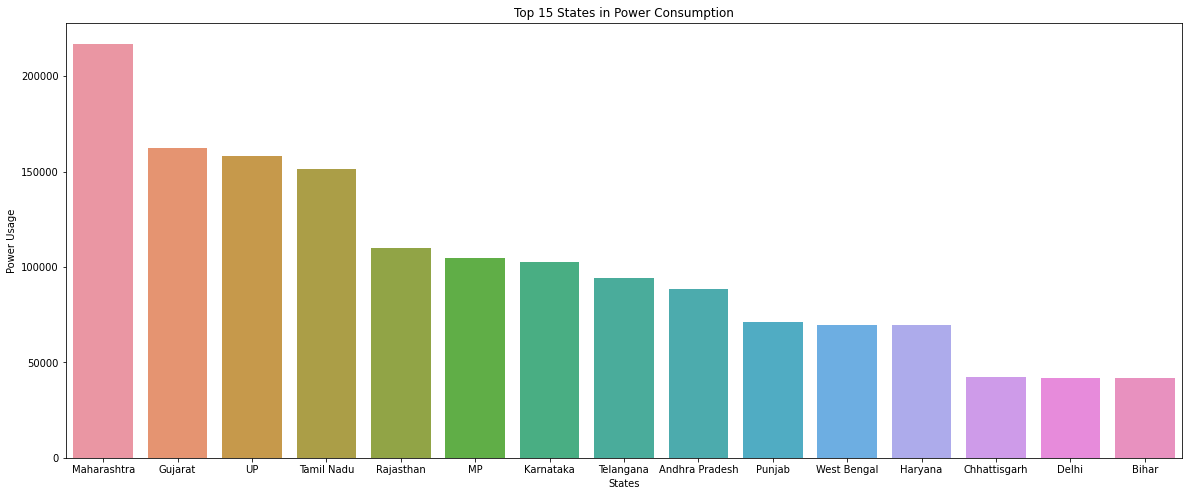

In [31]:
power_per_state = df.groupby("States").sum().sort_values("Usage", ascending=False)[0:15]
plt.figure(figsize=(20,8))
sns.barplot(x=power_per_state.index,y=power_per_state['Usage'],data=power_per_state)
plt.title("Top 15 States in Power Consumption")
plt.xlabel("States")
plt.ylabel("Power Usage")

Text(0, 0.5, 'Power Usage')

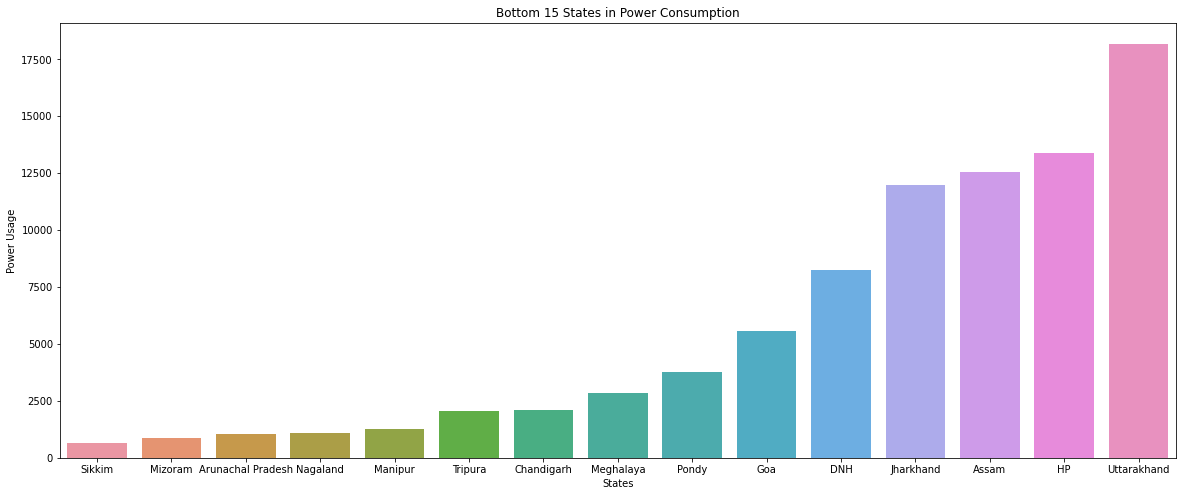

In [32]:
power_per_state = df.groupby("States").sum().sort_values("Usage", ascending=True)[0:15]
plt.figure(figsize=(20,8))
sns.barplot(x=power_per_state.index,y=power_per_state['Usage'],data=power_per_state)
plt.title("Bottom 15 States in Power Consumption")
plt.xlabel("States")
plt.ylabel("Power Usage")

**Power Consumption of Regions on Yearly Basis**

Text(0, 0.5, 'Power Usage')

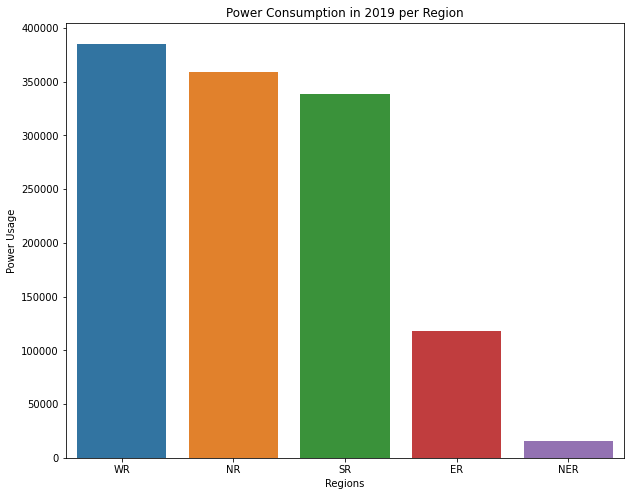

In [41]:
power_per_2019 = df[df['year'] == 2019].groupby("Regions").sum().sort_values("Usage", ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=power_per_2019.index, y=power_per_2019['Usage'], data=power_per_2019)
plt.title("Power Consumption in 2019 per Region")
plt.xlabel("Regions")
plt.ylabel("Power Usage")

Text(0, 0.5, 'Power Usage')

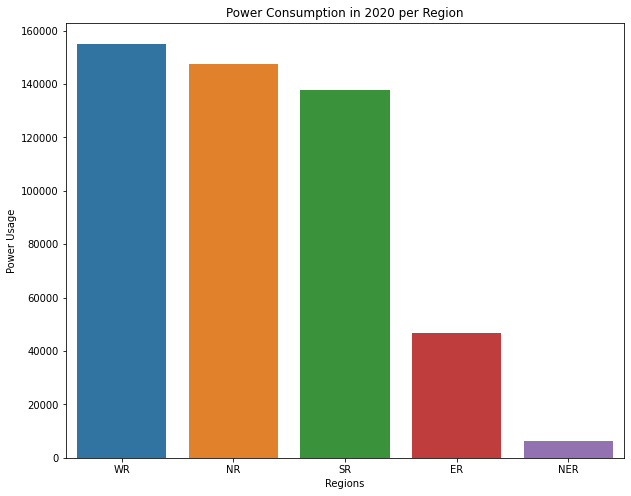

In [42]:
power_per_2020 = df[df['year'] == 2020].groupby("Regions").sum().sort_values("Usage", ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=power_per_2020.index, y=power_per_2020['Usage'], data=power_per_2020)
plt.title("Power Consumption in 2020 per Region")
plt.xlabel("Regions")
plt.ylabel("Power Usage")

**Power Consumption of Top(15) and Bottom(15) States on Yearly Basis**

##### 2019

Text(0, 0.5, 'Power Usage')

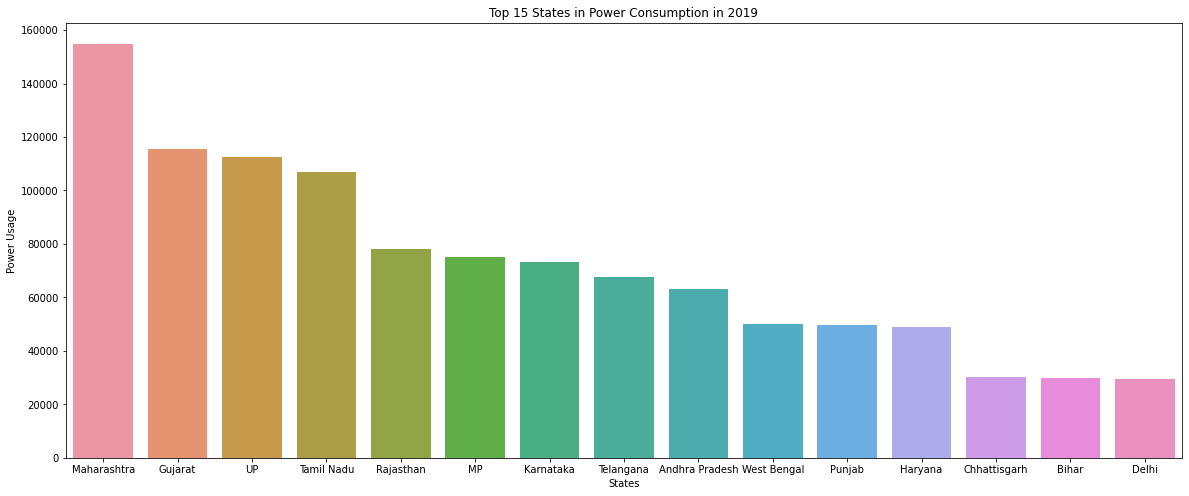

In [45]:
power_per_s2019 = df[df['year'] == 2019].groupby("States").sum().sort_values("Usage", ascending=False)[0:15]
plt.figure(figsize=(20, 8))
sns.barplot(x=power_per_s2019.index, y=power_per_s2019['Usage'], data=power_per_s2019)
plt.title("Top 15 States in Power Consumption in 2019")
plt.xlabel("States")
plt.ylabel("Power Usage")

Text(0, 0.5, 'Power Usage')

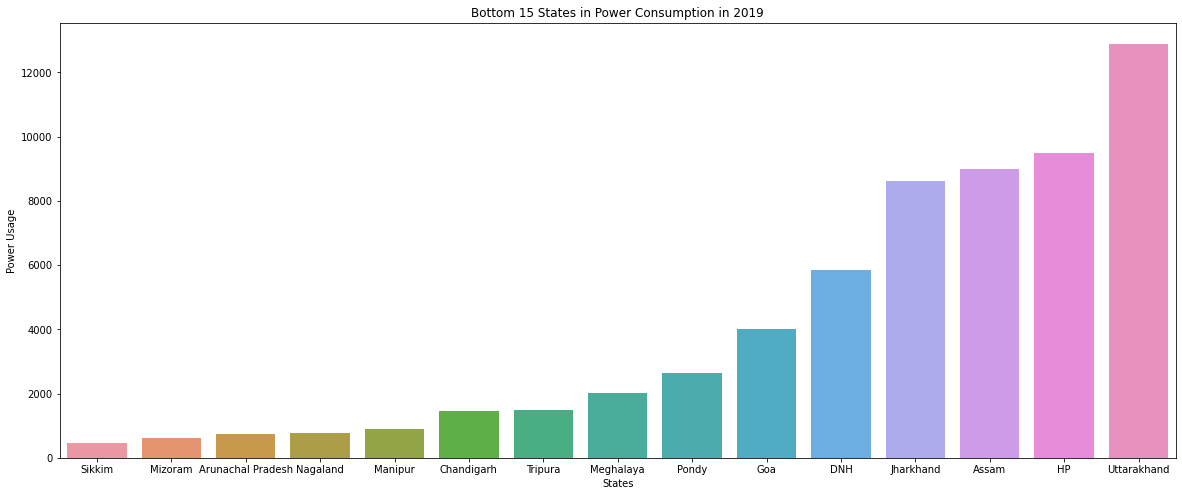

In [47]:
power_per_s2019 = df[df['year'] == 2019].groupby("States").sum().sort_values("Usage", ascending=True)[0:15]
plt.figure(figsize=(20, 8))
sns.barplot(x=power_per_s2019.index, y=power_per_s2019['Usage'], data=power_per_s2019)
plt.title("Bottom 15 States in Power Consumption in 2019")
plt.xlabel("States")
plt.ylabel("Power Usage")

##### 2020

Text(0, 0.5, 'Power Usage')

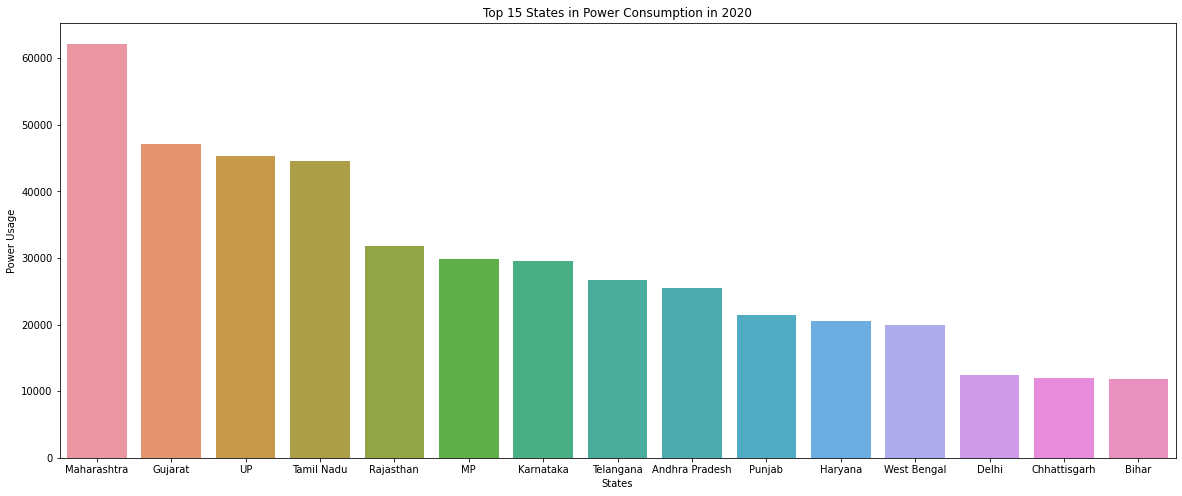

In [46]:
power_per_s2020 = df[df['year'] == 2020].groupby("States").sum().sort_values("Usage", ascending=False)[0:15]
plt.figure(figsize=(20, 8))
sns.barplot(x=power_per_s2020.index, y=power_per_s2020['Usage'], data=power_per_s2020)
plt.title("Top 15 States in Power Consumption in 2020")
plt.xlabel("States")
plt.ylabel("Power Usage")

Text(0, 0.5, 'Power Usage')

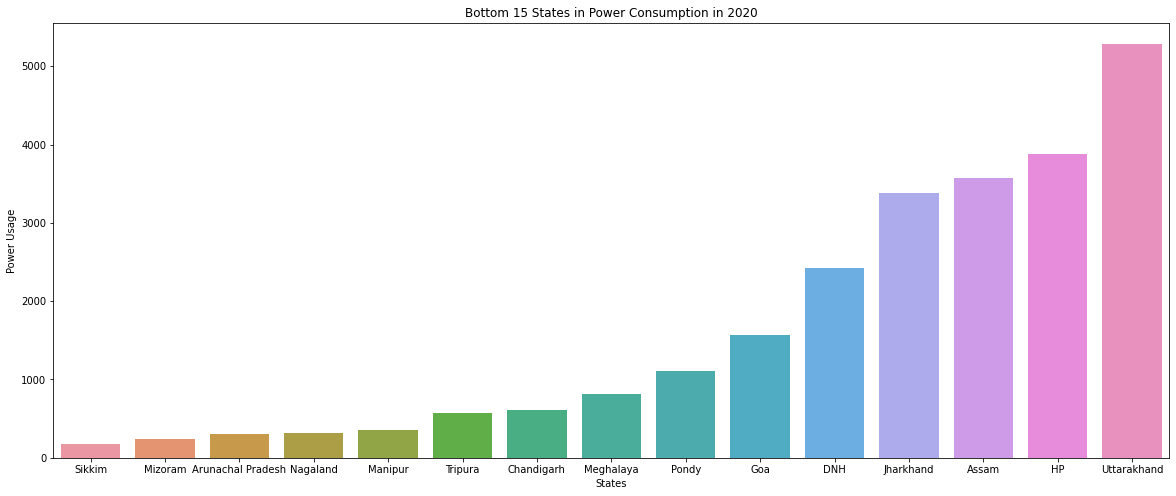

In [48]:
power_per_s2020 = df[df['year'] == 2020].groupby("States").sum().sort_values("Usage", ascending=True)[0:15]
plt.figure(figsize=(20, 8))
sns.barplot(x=power_per_s2020.index, y=power_per_s2020['Usage'], data=power_per_s2020)
plt.title("Bottom 15 States in Power Consumption in 2020")
plt.xlabel("States")
plt.ylabel("Power Usage")